In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import scipy.stats
from math import log
from scipy.stats import uniform
from scipy.stats import cauchy

1. Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [3]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for i in range(1000)]
Numbers = np.arange(0,10)
arr = np.zeros(10)
arr1 = np.zeros(10)
ves = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
ves = ves/ves.sum()

In [4]:
print(ves)

[0.05973121 0.14932802 0.08312593 0.11946242 0.15430562 0.26879044
 0.05525137 0.0099552  0.00049776 0.09955202]


In [5]:
print(ves.sum())

1.0


In [6]:
NumbersSort = ves.argsort()[::-1]
vesSort = np.sort(ves)[::-1]
print(vesSort)
print(NumbersSort)

[0.26879044 0.15430562 0.14932802 0.11946242 0.09955202 0.08312593
 0.05973121 0.05525137 0.0099552  0.00049776]
[5 4 1 3 9 2 0 6 7 8]


In [7]:
for i in range (1, 10):
    ves[i] = ves[i] + ves[i-1]
    vesSort[i] = vesSort[i] + vesSort[i-1]

Неупорядоченный вес:

In [10]:
t1 = time.time()
for i in range(1000):
    for j in range (10):
        if ((j == 0 and random[i] < ves[j]) or (j !=0 and random[i] < ves[j] and random[i] >= ves[j-1])):
            arr[j] = arr[j] + 1
            break

t2 = time.time()
print(t2 - t1) 
print(arr)

0.014002799987792969
[ 98. 326. 150. 238. 308. 542. 118.  20.   4. 196.]


Упорядоченный вес:

In [11]:
t1 = time.time()
for i in range(1000):
    for j in range (10):
        if ((j == 0 and random[i] < vesSort[j]) or (j !=0 and random[i] < vesSort[j] and random[i] >= vesSort[j-1])):
            arr1[j] = arr1[j] + 1
            break

t2 = time.time()
print(t2 - t1) 
print(arr1)

0.006000995635986328
[536. 304. 290. 212. 210. 180. 136. 112.  20.   0.]


С упорядоченными весами работает быстрее, чем с неупорядоченными.

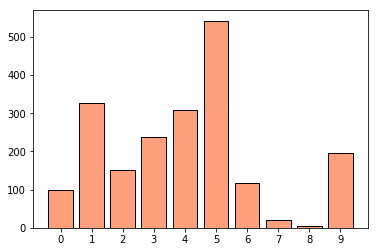

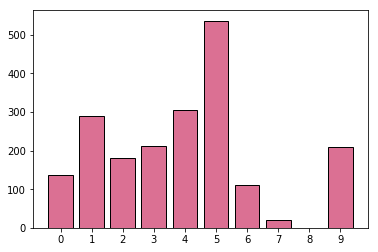

In [73]:
plt.bar(Numbers, arr, color='lightsalmon', edgecolor = 'black')
plt.xticks(Numbers)
plt.show()

plt.bar(NumbersSort, arr1, color='palevioletred', edgecolor = 'black')
plt.xticks(NumbersSort)
plt.show()

2. Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

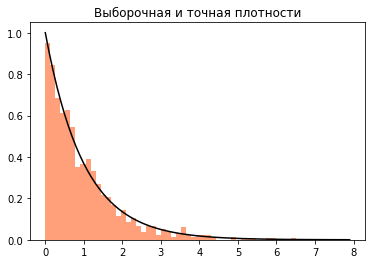

In [21]:
def Ln(x, y):
    return -log(1-x)/y

random = [rng() for i in range(1000)]
random = [Ln(random[i], 1) for i in range(1000)]
plt.title("Выборочная и точная плотности")
plt.hist(random, density=True, bins = 50, color = 'lightsalmon')
r = np.arange(0, 8, .1)
plt.plot(r, scipy.stats.expon.pdf(r, scale=1),color = 'black')
plt.show()

3. Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

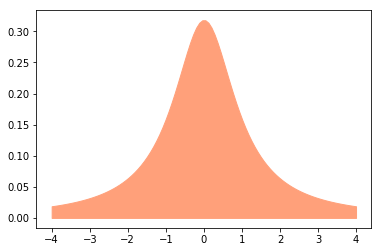

In [33]:
from scipy import stats
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x), color = 'lightsalmon') #needs to be normalized!
plt.show()

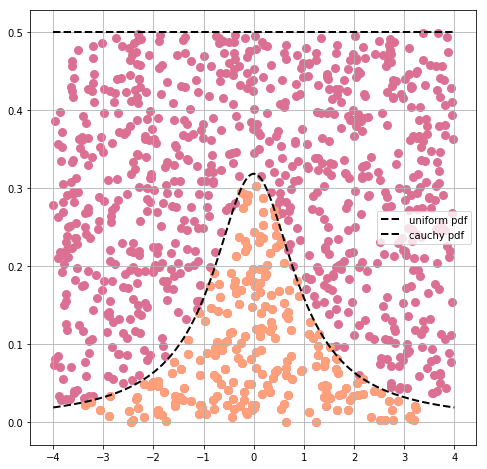

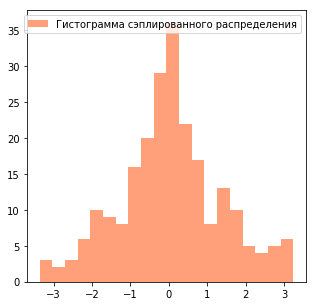

In [32]:
import random
plt.figure(figsize = (8, 8))
x = np.linspace(-4, 4, 1000)
Ravnom = uniform(-4, 8)

X_sample = np.array([random.uniform(-4, 4) for i in range (1000)])
Y_sample = np.array([random.uniform(0, 0.5) for i in range (1000)])

plt.plot(x, 4*Ravnom.pdf(x),'r--', lw=2, label='uniform pdf', color = 'black')
plt.plot(x, cauchy.pdf(x), 'r--', lw=2, label='cauchy pdf', color = 'black')
plt.scatter(X_sample, Y_sample, color = 'palevioletred', lw = 3)
plt.legend()
grid1 = plt.grid(True)
Cauchy = np.where(Y_sample <= cauchy.pdf(X_sample))

plt.scatter(X_sample[Cauchy], Y_sample[Cauchy], color = 'lightsalmon', lw =3)

plt.figure(figsize = (5, 5))
plt.hist(X_sample[Cauchy], bins = 20, color = 'lightsalmon', label = 'Гистограмма сэплированного распределения')
plt.legend()
plt.show()

4. Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

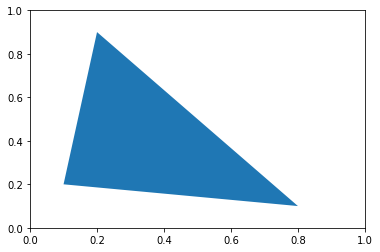

In [54]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

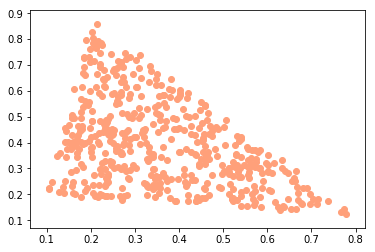

In [57]:
x = np.array([rng() for i in range(500)])
y = np.array([rng() for i in range(500)])
x[(x + y) > 1] = 1 - x[(x + y) > 1]
y[(x + y) > 1] = 1 - y[(x + y) > 1] 

x =  0.7 * x + 0.1 * y + 0.1
y = -0.1 * x + 0.7 * y + 0.2

plt.scatter(x, y, color = 'lightsalmon')
plt.show()

5. Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

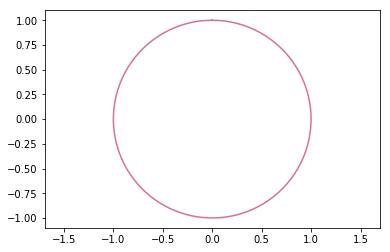

In [72]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t), color = 'palevioletred')
plt.axis('equal')
plt.show()

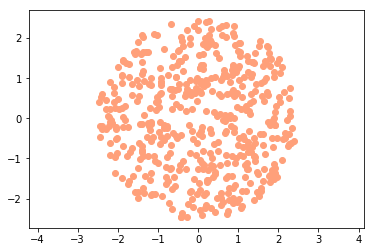

In [59]:
PI = np.pi
A = np.array([rng()*2*PI for i in range(500)])
R = [rng()*2*np.pi for i in range(500)]
plt.scatter(np.sqrt(R) * np.cos(A), np.sqrt(R) * np.sin(A), color = 'lightsalmon')
plt.axis('equal')
plt.show()

6. Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

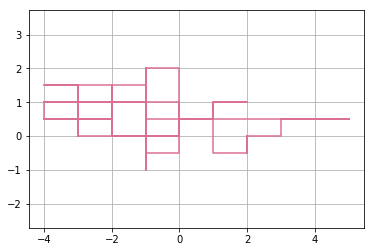

In [71]:
def Straying():
    x = np.array([(rng()-0.5)*2 for i in range(500)]) 
    y = np.where(x > 0)
    y = y[0][0:50]
    z = np.where(x < 0)
    z = z[0][0:50]

    A = np.zeros(120)
    A[y] += 1

    B = np.zeros(120)
    B[z] += 1
    
    AA = A[(A != 0) | (B != 0)]
    BB = B[(A != 0) | (B != 0)]

    return np.cumsum(AA - BB)

X = Straying()
Y = Straying()
X = (X + Y) / 2 
Y = (X - Y) / 2
plt.plot(X, Y, color = 'palevioletred')
plt.axis('equal')
grid = plt.grid(True)
plt.show()

7. Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

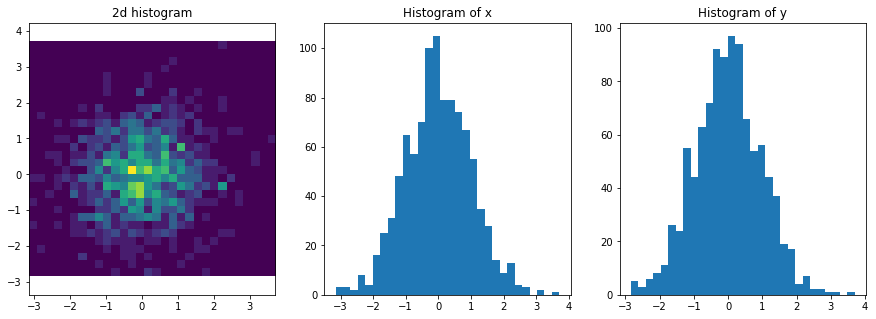

In [74]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

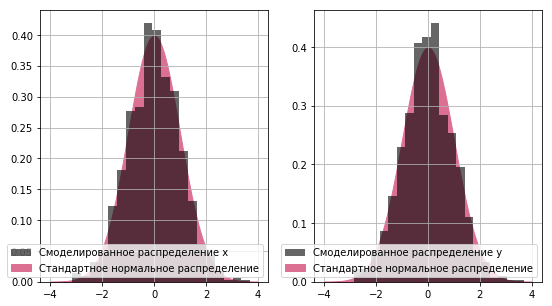

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
ax[0].hist(x, bins = 20, density=True, alpha = 0.6, color = 'black', label = 'Смоделированное распределение х')
ax[1].hist(y, bins = 20, density=True, alpha = 0.6, color = 'black', label = 'Смоделированное распределение у')
dist = stats.norm()
grid0 = ax[0].grid(True)
L = np.linspace(-4, 4, 1000)
ax[0].fill_between(L, 0, dist.pdf(L), color = 'palevioletred', label = 'Стандартное нормальное распределение')
grid1 = ax[1].grid(True)
ax[1].fill_between(L, 0, dist.pdf(L), color = 'palevioletred', label = 'Стандартное нормальное распределение')
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
plt.show()

Aлгоритм Box-Muller algorithm формирует выборку из независимых N(0,1) случаных величин.

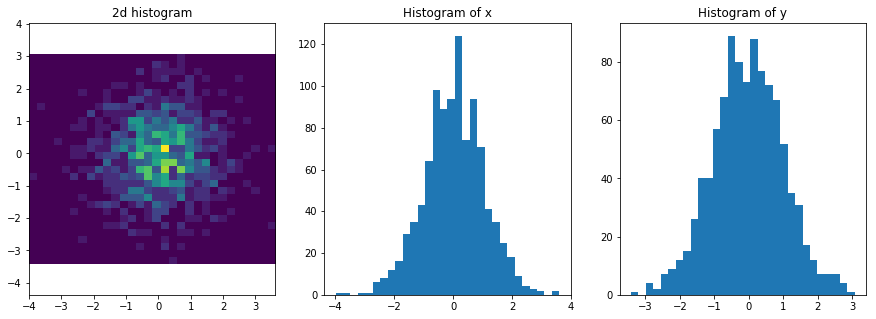

In [83]:
i = 0
cos = np.array([])
sin = np.array([])
while i<1000:
    u, v = 2*np.random.rand(2,1)-1
    s = u**2+v**2
    if 0<s<=1:
        cos = np.append(cos, u)
        sin = np.append(sin, v)
        i+=1

s = cos**2+sin**2
r = np.sqrt(-2 * np.log(s)/s)
x = cos * r
y = sin * r
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Нужно получить из случайного вектора, компоненты которого являются независимыми гауссовскими величинами с параметрами (0, 1), гауссовский вектор с мат.ожиданием (3, 6) и матрицей ковариаций ((2, 1), (1, 4)). Для этого воспольлуемся теоремой об изменении матрицы ковариации при линейных заменах. Решим матричное уравнение (например, методом Холецкого).

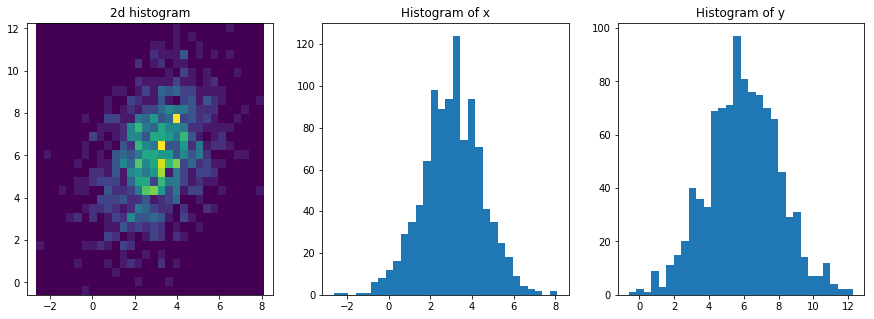

In [84]:
X = np.sqrt(2) * x + 3
Y = 1 / np.sqrt(2) * x + np.sqrt(7 / 2) * y + 6

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(X, Y, bins=30)
ax[0].axis('equal')
ax[1].hist(X, bins=30)
ax[2].hist(Y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

8. Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [85]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])
np.linalg.det(B)

0.0

In [86]:
C = B[:8, :8]
np.linalg.det(C)

10125.000000000007

In [88]:
L = np.linalg.cholesky(C)
Last_line = (L[0:1] + L[4:5])*(-1)
print(Last_line)

[[-0.70710678 -0.         -0.         -0.         -1.22474487 -0.
  -0.         -0.        ]]


In [89]:
result = np.concatenate((L, Last_line), axis=0)
row = np.zeros((9,1))
result1 = np.concatenate((result, row), axis=1)
E = np.eye(9)
np.dot(np.dot(result1,E),result1.T)

array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
       [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
       [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

9. С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число π с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

In [91]:
import random
def Pi(iterations):
    x = 0
    for i in range(iterations):
        x += (1-random.random()**2)**.5
    return (4*x/iterations)
PI = np.pi
PI

3.141592653589793

Воспользуемся ЦТП: 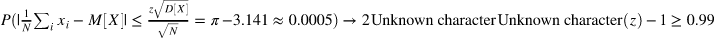

Находим z: 

Находим N: 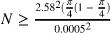

=> 

In [92]:
N = 4487689
for i in range(1,6):
    print(Pi(N))

3.141095707003155
3.1417219734717055
3.1417326181955603
3.141839008999122
3.1419037540884727


10. Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [123]:
def Generation(n):
    Bell = 0
    for k in range (1,101):
        Bell += (k)**n/np.math.factorial(k)
    Bell *= 1/np.exp(1)
    Prob = np.array([(k)**n/(Bell*np.math.factorial(k)*np.exp(1)) for k in range(100)])
    Mass1 = np.cumsum(Prob)
    V = np.random.rand()
    SUM = 0
    while 1:
        if V < Mass1[SUM]:
            V = SUM + 1
            break;
        else:
            SUM += 1
    Prob = np.array([1/V for i in range(V)])
    Mass1 = np.cumsum(Prob)
    Mass2 = np.array([rng() for i in range(n)])
    list1 = []
    for i in range(n):
        SUM = 0
        while SUM != -1:
            if Mass1[SUM] > Mass2[i]:
                list1.append(SUM)
                SUM =- 1
            else:
                SUM += 1
    return list1

E = 0
for i in range(1000):
    E += len(np.unique(Generation(100)))
result = E/1000
print(result)

29.529
